In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from quantities import s, ms, Hz
from neo.core import Block, Segment, ChannelIndex, Unit, SpikeTrain, AnalogSignal, Event
from NeoObject import NeoObject
from experimentData import ExperimentData

# Analysis for pararecording spike trains

In [2]:
neoObject = NeoObject()
blk_L = [neoObject.createDataBlock(eID) for eID in neoObject.experimentID]

In [3]:
blk_L

[Block with 241 segments, 1 channel_indexes
 # segments (N=241)
 0: Segment with 11 spiketrains name: 'trial 0' # analogsignals (N=0)
 1: Segment with 11 spiketrains name: 'trial 1' # analogsignals (N=0)
 2: Segment with 11 spiketrains name: 'trial 2' # analogsignals (N=0)
 3: Segment with 11 spiketrains name: 'trial 3' # analogsignals (N=0)
 4: Segment with 11 spiketrains name: 'trial 4' # analogsignals (N=0)
 5: Segment with 11 spiketrains name: 'trial 5' # analogsignals (N=0)
 6: Segment with 11 spiketrains name: 'trial 6' # analogsignals (N=0)
 7: Segment with 11 spiketrains name: 'trial 7' # analogsignals (N=0)
 8: Segment with 11 spiketrains name: 'trial 8' # analogsignals (N=0)
 9: Segment with 11 spiketrains name: 'trial 9' # analogsignals (N=0)
 10: Segment with 11 spiketrains name: 'trial 10' # analogsignals (N=0)
 11: Segment with 11 spiketrains name: 'trial 11' # analogsignals (N=0)
 12: Segment with 11 spiketrains name: 'trial 12' # analogsignals (N=0)
 13: Segment with 11

## Spike raster plot

Spike raster plot By Unit of None


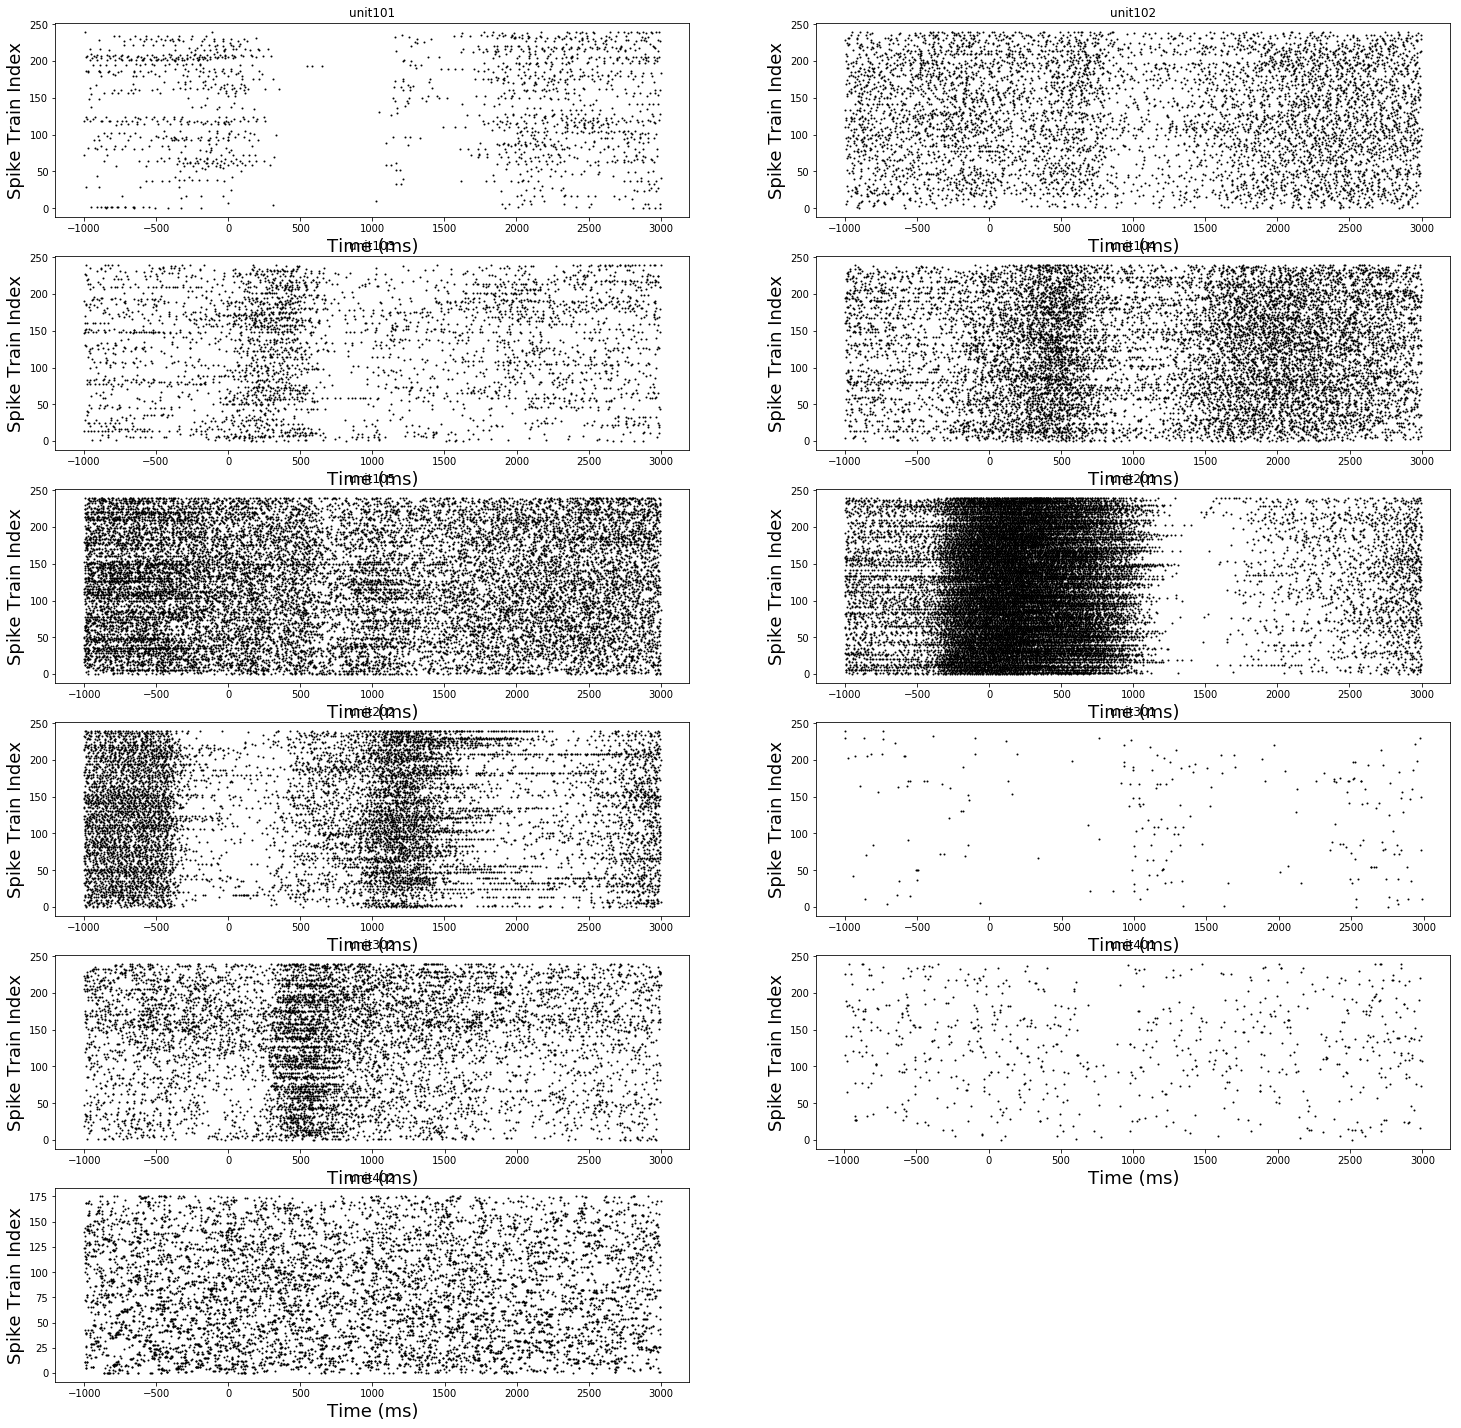

In [50]:
# for blk in blk_L:
#     for unit in blk.list_units:
#         for i, spiketrain in enumerate(unit.spiketrains):
#             plt.plot(spiketrain, i*np.ones_like(spiketrain), 'k.', markersize=2)

fig = plt.figure(figsize=(25,25))
axes = []

# for blk in blk_L:
blk = blk_L[0]
print('Spike raster plot By Unit of %s' % blk.name)
for unit_i, unit in enumerate(blk.list_units):
    axes.append(fig.add_subplot(len(blk.list_units)//2+1, 2, unit_i+1))
    for i, spiketrain in enumerate(unit.spiketrains):
        axes[unit_i].plot(spiketrain, i*np.ones_like(spiketrain), 'k.', markersize=2)
    axes[unit_i].set_title('%s' % unit.name)
    plt.xlabel('Time (ms)', fontsize=18)
    plt.ylabel('Spike Train Index', fontsize=18)

## Tbhv

In [33]:
eData = ExperimentData()
Tbhv_A = eData.getTbhv_A(eData.experimentID[0])

In [34]:
TbhvLabels = np.array(['start of trials','in Center','cue onset','go signals','move onset','in peripheral target','reward','end of trials'])

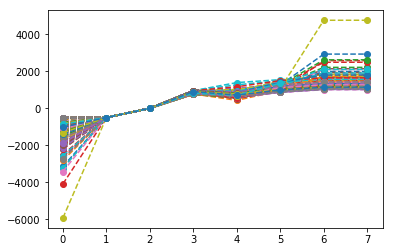

In [38]:
for Tbhv in Tbhv_A:
    plt.plot(Tbhv, '--o')

In [19]:
eData = ExperimentData()
Tbhv_A = eData.getTbhv_A(eData.experimentID[1])

In [20]:
TbhvLabels = np.array(['start of trials','in Center','cue onset','go signals','move onset','in peripheral target','reward','end of trials'])

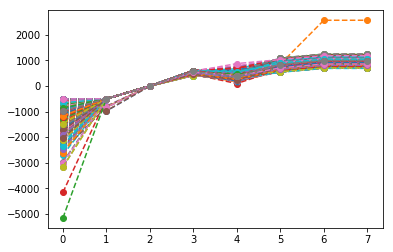

In [30]:
for Tbhv in Tbhv_A:
    if Tbhv[1] > -1000:
        plt.plot(Tbhv, '--o')

## PSTH

PSTH By Unit of m4404ee


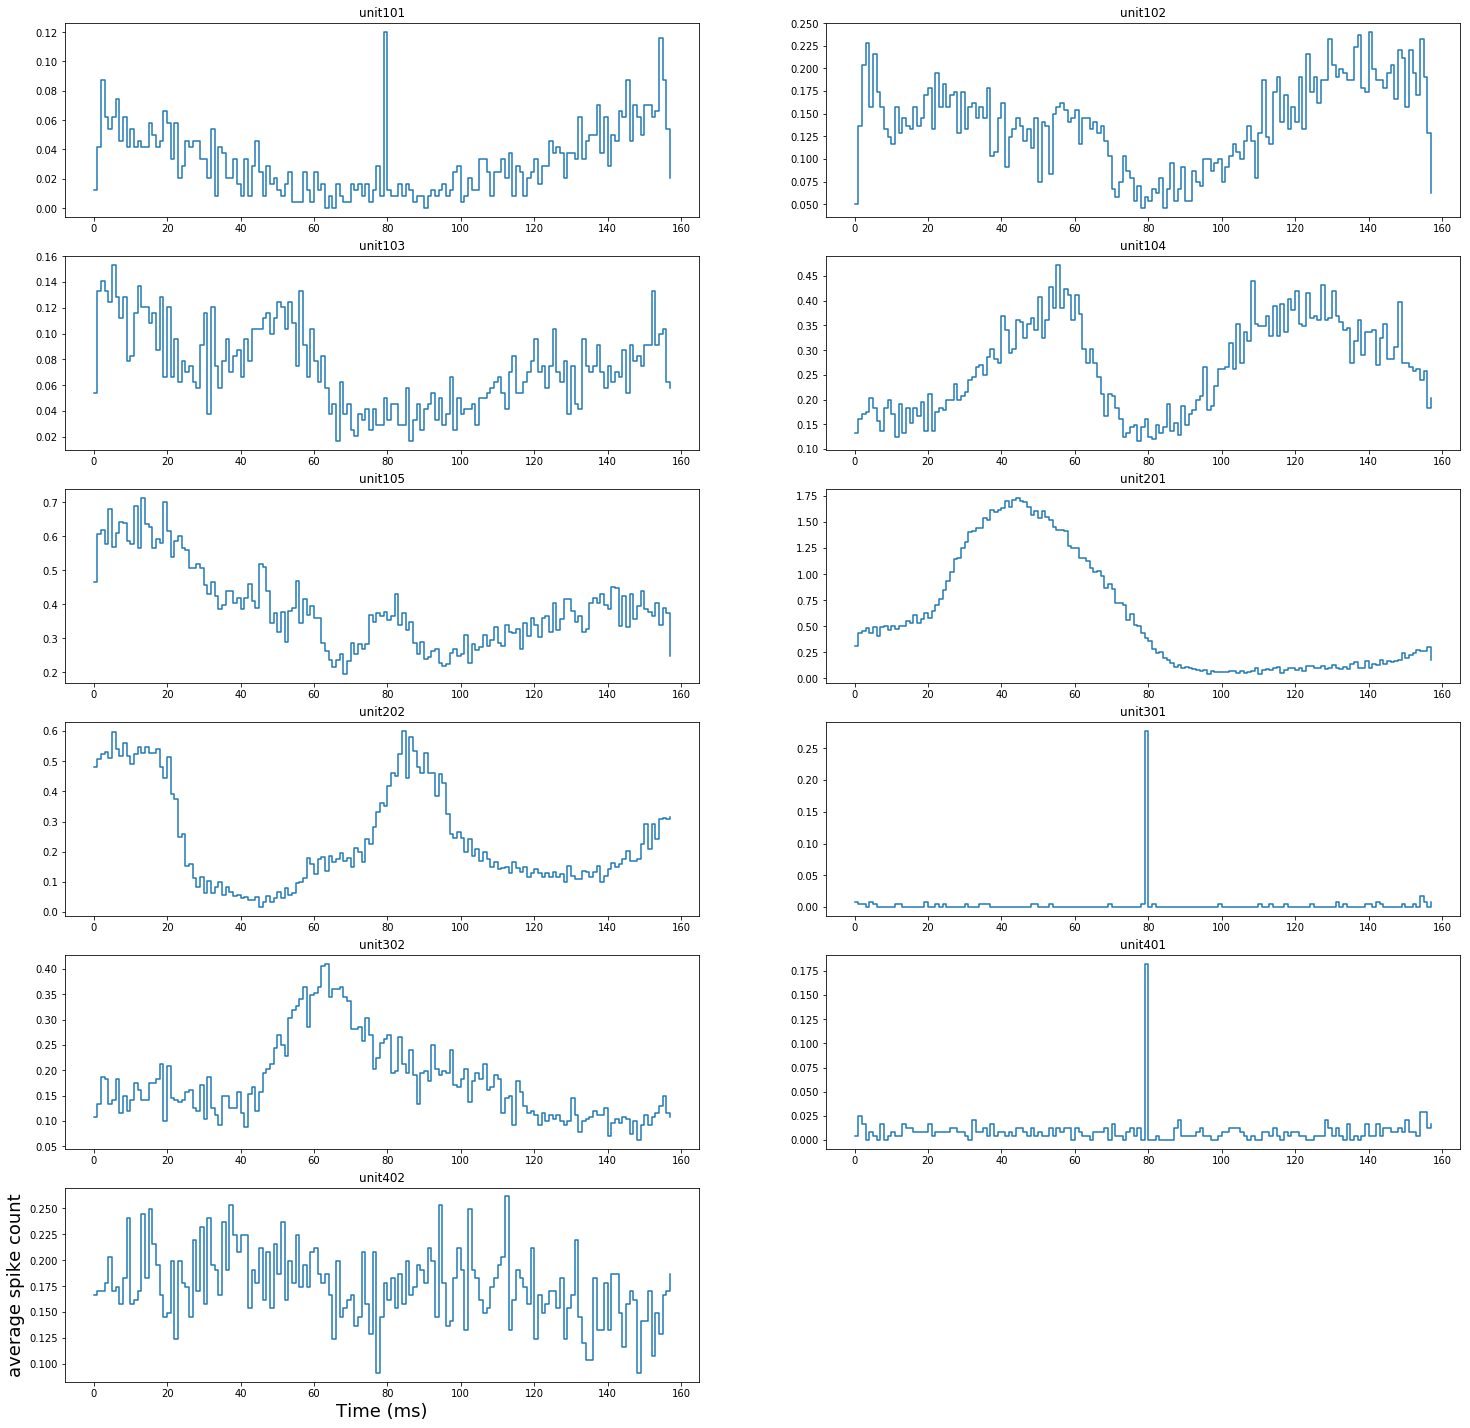

In [87]:
fig = plt.figure(figsize=(25,25))
axes = []

# for blk in blk_L:
blk = blk_L[0]
print('PSTH By Unit of %s' % blk.name)
for unit_i, unit in enumerate(blk.list_units):
    axes.append(fig.add_subplot(len(blk.list_units)//2+1, 2, unit_i+1))
    
    bins = 160 # 25ms
    sum_hist = np.zeros(bins)
    for spiketrain in unit.spiketrains:
        hist, bin_edges = np.histogram(spiketrain, bins)
        sum_hist = sum_hist + hist
    PSTH = sum_hist / len(unit.spiketrains)
#     plt.plot(PSTH, drawstyle='steps-post')

    axes[unit_i].plot(PSTH[1:-1], drawstyle='steps-post')
    axes[unit_i].set_title('%s' % unit.name)
plt.xlabel('Time (ms)', fontsize=18)
plt.ylabel('average spike count', fontsize=18)

## Unitary Event (UE) Analysis

In [51]:
import elephant
import elephant.unitary_event_analysis as uea

/Users/motofumishishikura/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/elephant/spade.py:82: UserWarning: fim.so not found in elephant/spade_src folder,you are using the python implementation of fast fca
  'you are using the python implementation of fast fca')
